# Define figure projection
Here we should the most minimal use of `Antarctic-Plots`. This example just creates a projection in EPSG:3031, based on a region and figure height (or width). The rest of the example uses standard PyGMT calls.

Import the packages

In [24]:
%%capture
%load_ext autoreload
%autoreload 2

from antarctic_plots import fetch, utils, regions
import pygmt

Fetch the data to plot

In [25]:
bed = fetch.bedmachine(layer="bed")

returning original grid


Define a region for the plot

In [26]:
# Options:

# 1) use the full extent of the grid file
# region = utils.get_grid_info(bed)[1]

# 2) use a preset region (antarctic_plots.regions())
# region = regions.ross_ice_shelf

# 3) define your own region, in meters e, w, n, s in EPSG:3031
region = [-760e3, 600e3, -2200e3, -350e3]

Create a projection from the region

In [27]:
# set figure projection and size from input region
proj_xy = utils.set_proj(region, fig_height=15)[0]
fig_width = utils.set_proj(region, fig_height=15)[2]

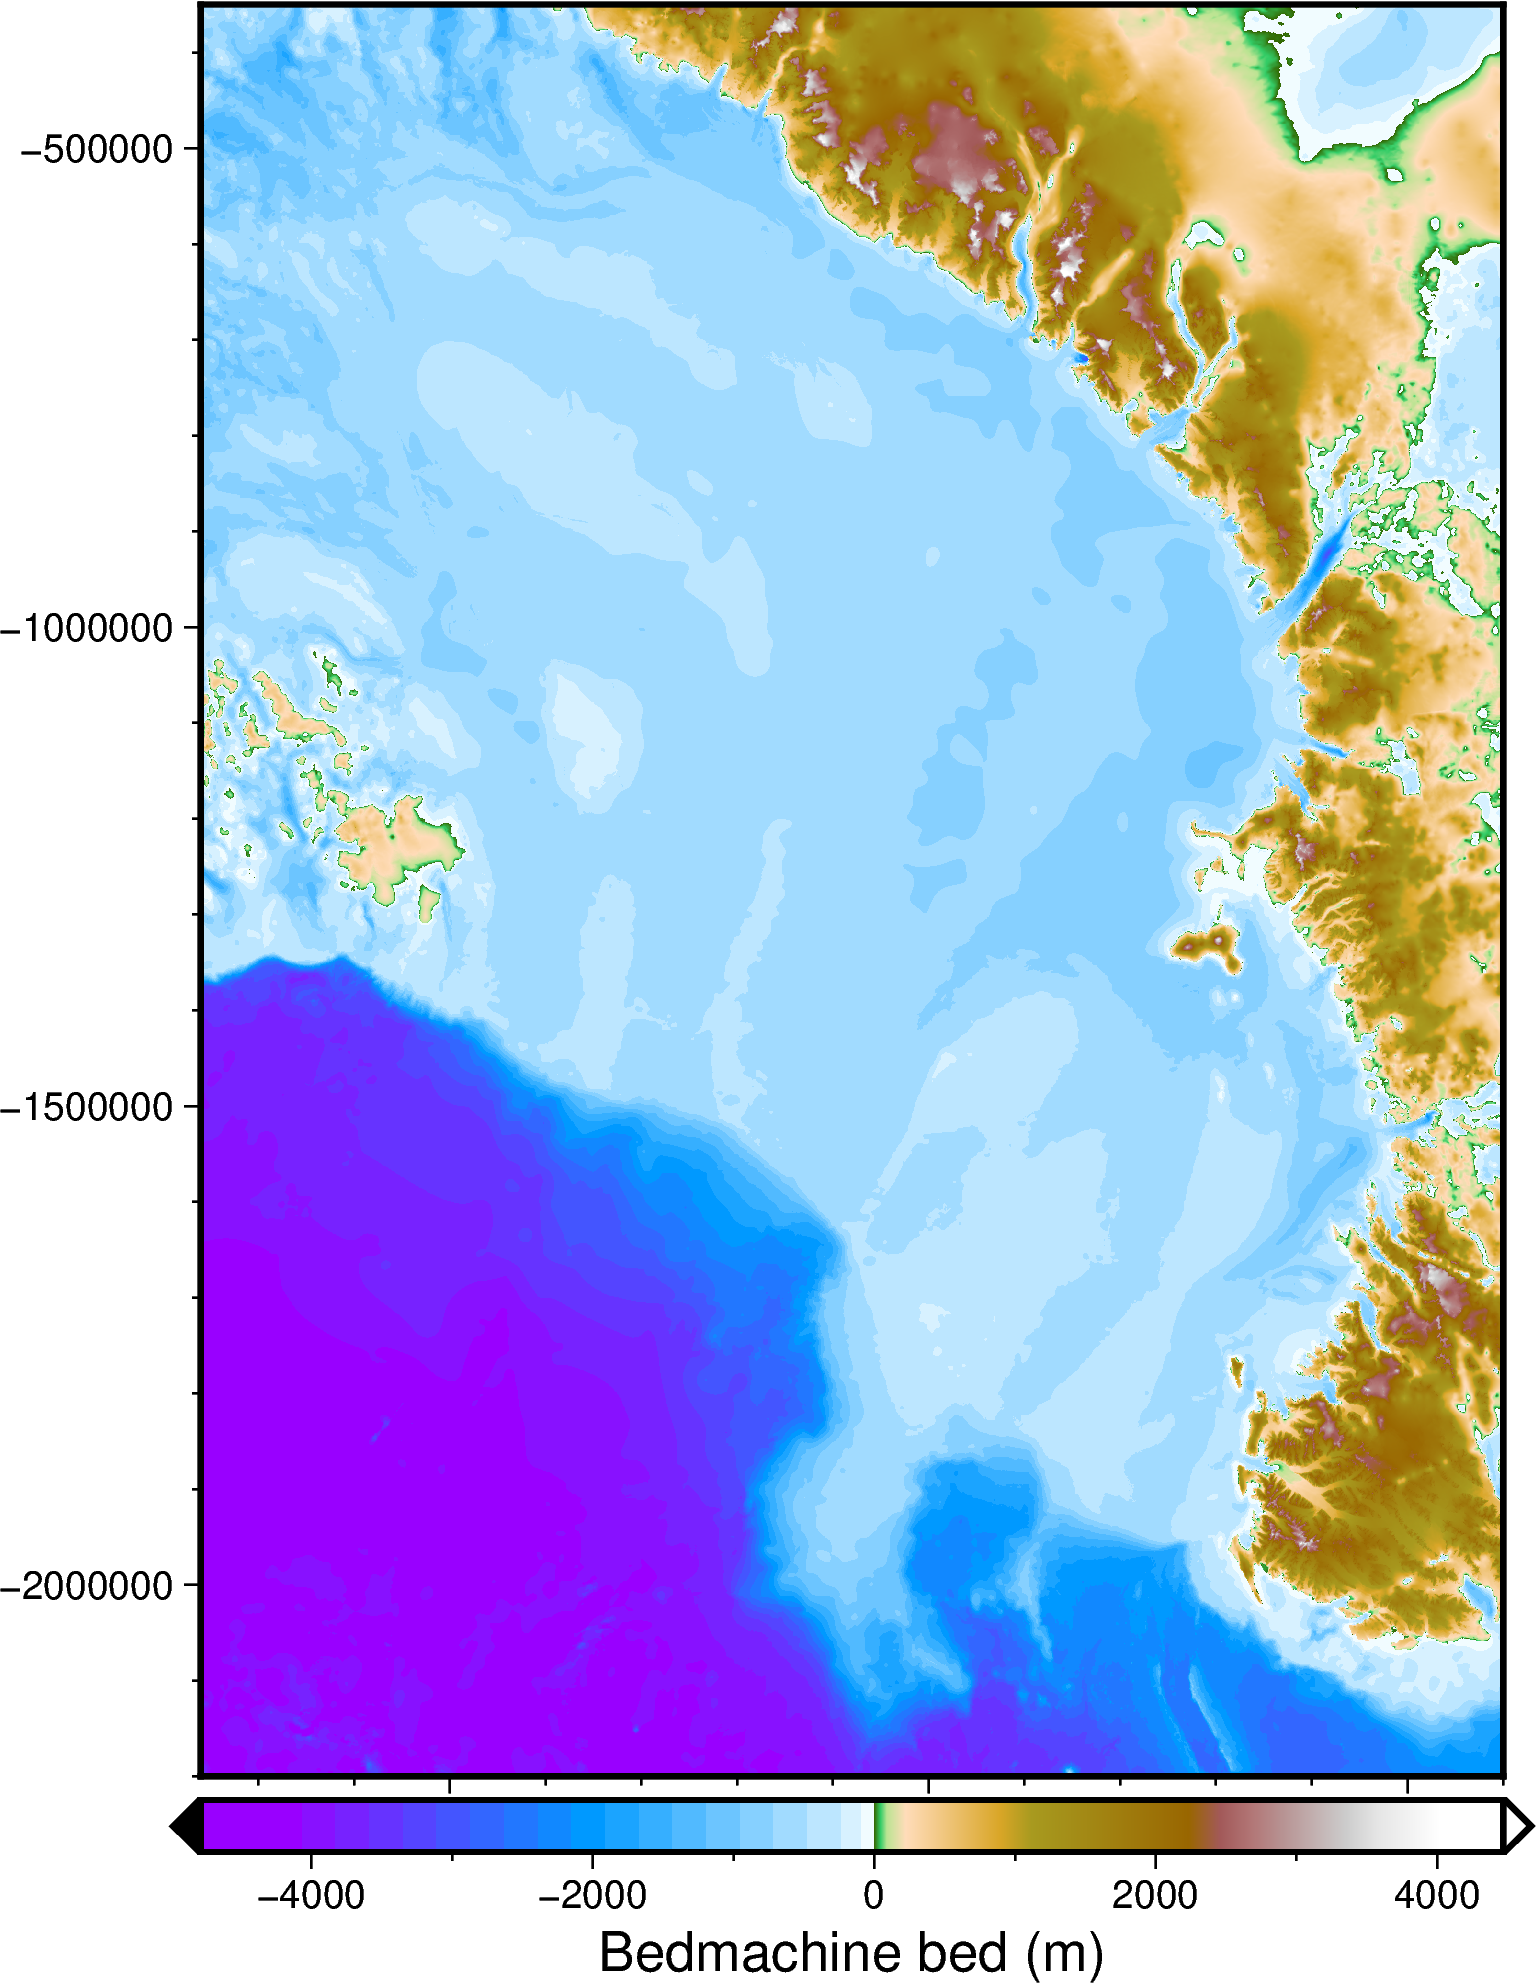

In [28]:
# use standard PyGMT commands to plot figure
fig = pygmt.Figure()

fig.grdimage(
    grid=bed,
    cmap="globe",
    projection=proj_xy,
    region=region,
    frame=True,
    nan_transparent=True,
)

# display colorbar
fig.colorbar(
    cmap=True,
    position=f"jBC+w{fig_width}c+jTC+h+o0c/.2c+e",
    frame="xaf+lBedmachine bed (m)",
)

# save the figure to use in the Gallery examples
fig.savefig("outputs/setting_projection.png")

# display the figure
fig.show()